In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import poisson, binom, nbinom, lognorm, pareto, gamma
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns

In [40]:
# Load the claims data file into a DataFrame 
file_path = "/Users/thomasdeconinck/Documents/GitHub/Assurance-Code-Python/claim_data_group4_2024.csv"
claims_data = pd.read_csv(file_path)

In [41]:
claims_data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,2271893,0,0.83,E,5,17,53,64,B2,Diesel,3317,R93,0.0
1,1111864,0,0.24,E,5,2,27,64,B3,Diesel,2740,R22,0.0
2,72908,0,0.50,E,7,11,67,50,B3,Regular,4762,R93,0.0
3,2283027,0,0.08,B,5,8,28,60,B1,Diesel,64,R91,0.0
4,1123838,0,0.03,A,11,1,38,50,B2,Regular,16,R24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,70445,0,1.00,C,5,11,37,56,B2,Diesel,317,R82,0.0
99996,4163362,0,0.22,E,6,13,58,50,B1,Diesel,4762,R93,0.0
99997,2081912,0,1.00,E,5,1,49,50,B2,Diesel,4998,R11,0.0
99998,2012998,0,0.71,D,9,9,36,54,B1,Regular,1541,R91,0.0


# Descriptive Statistics

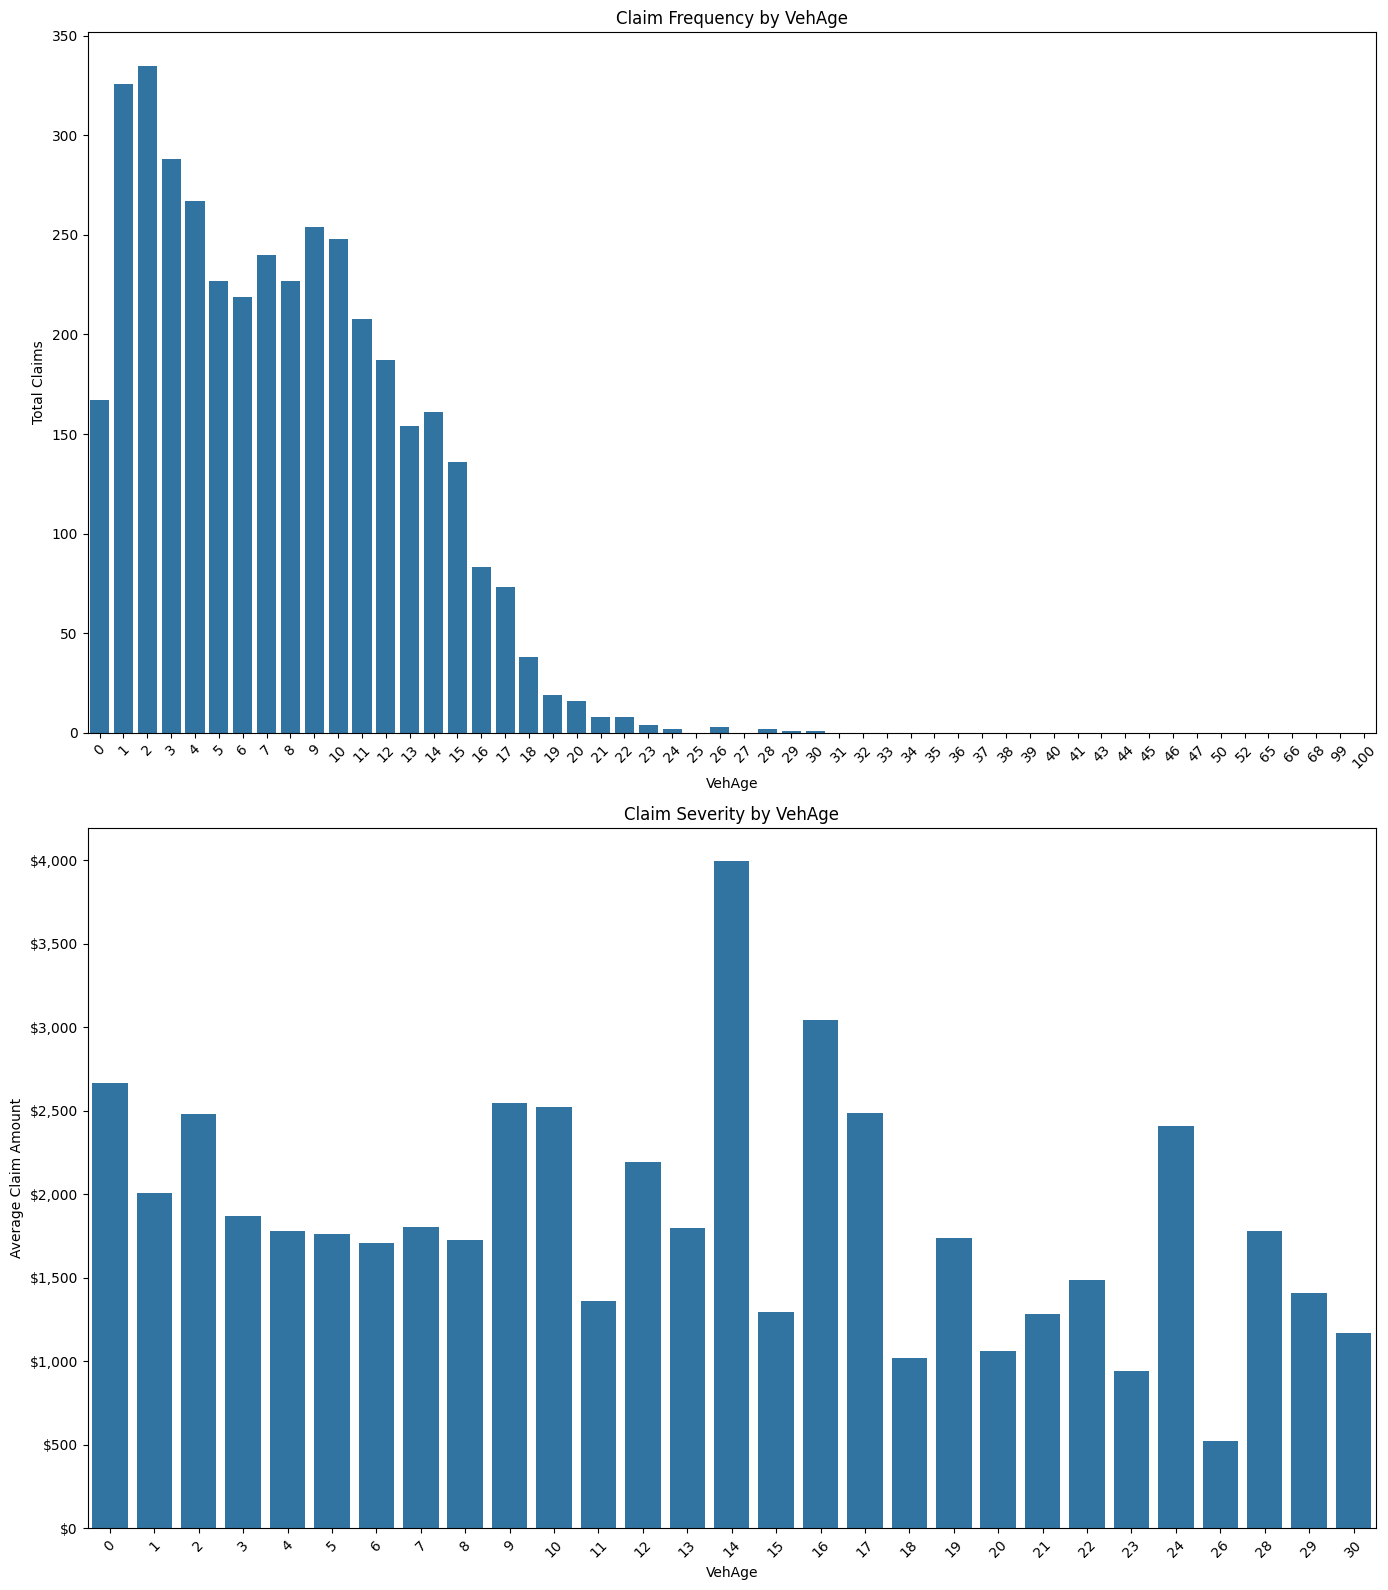

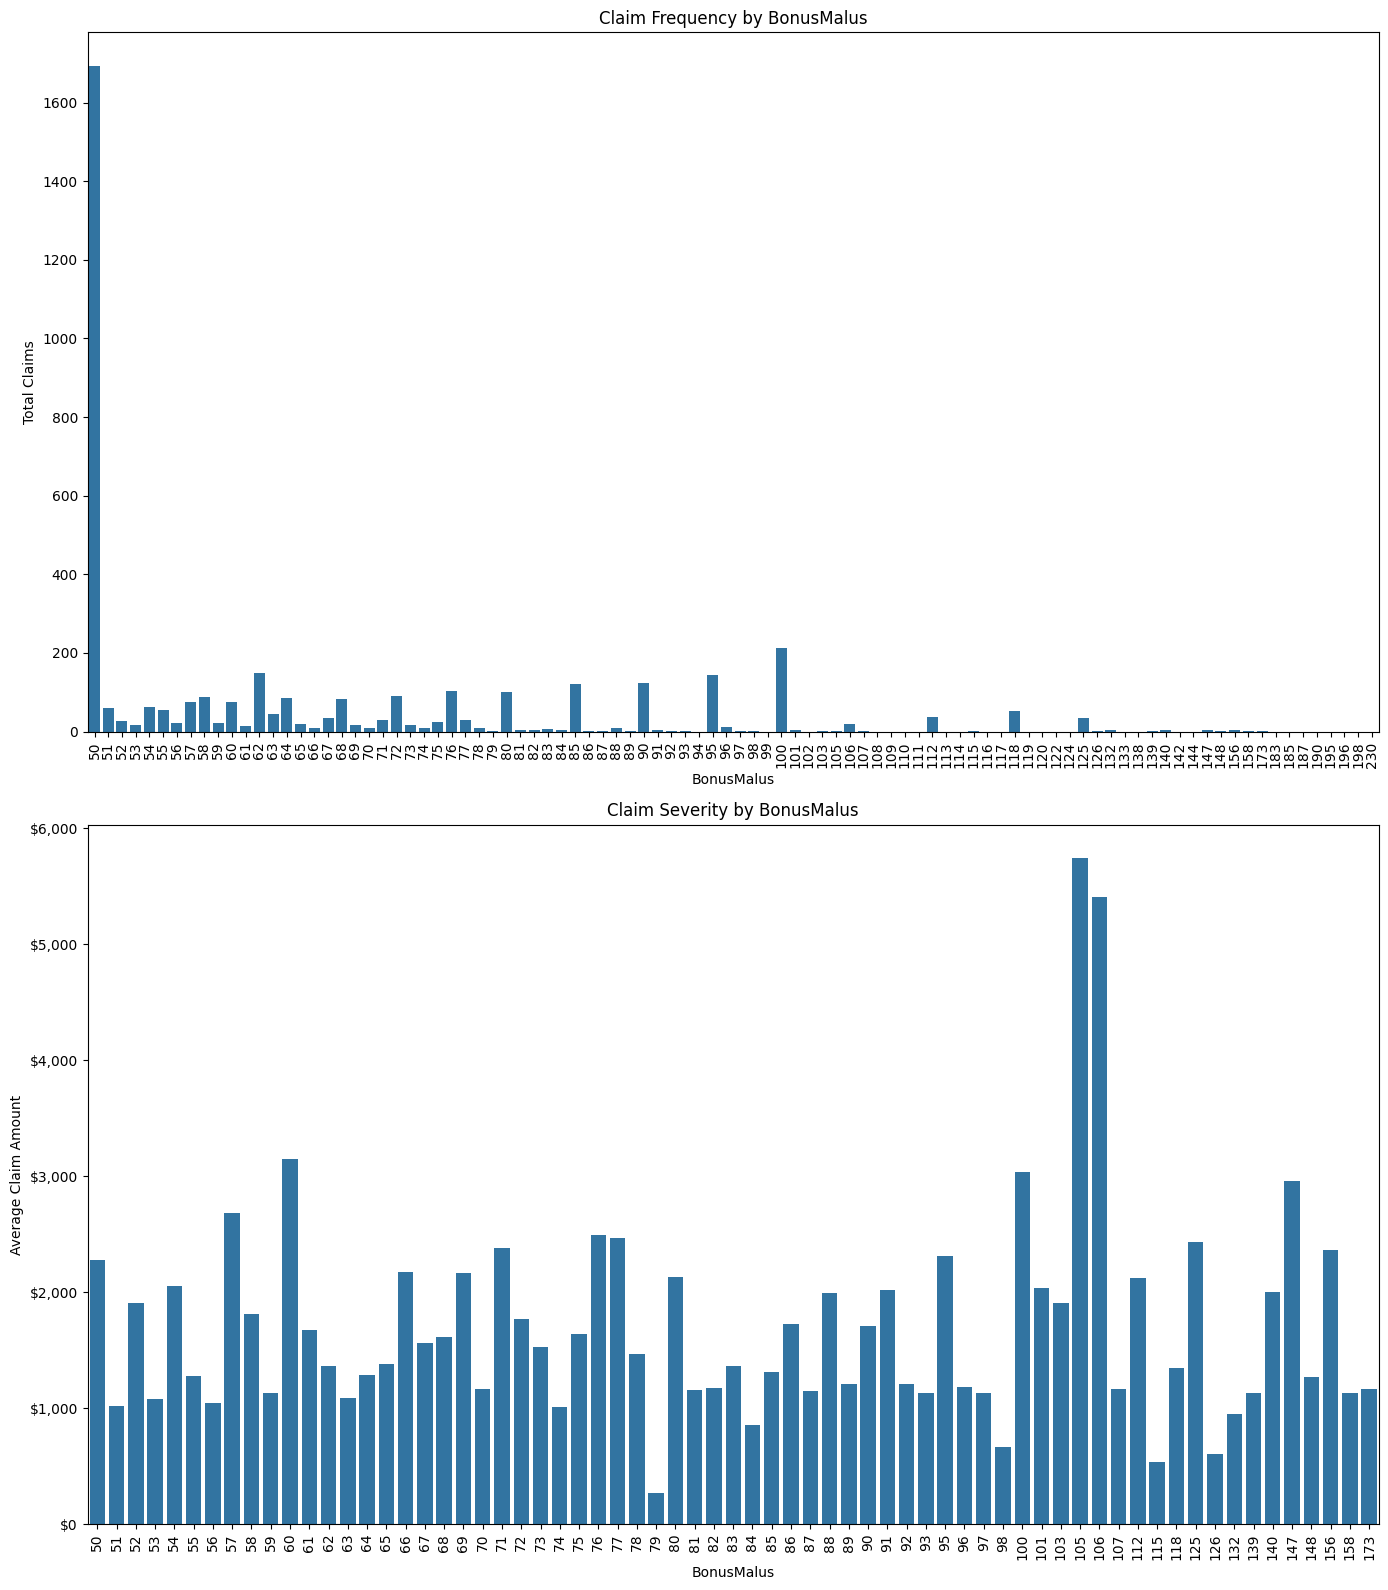

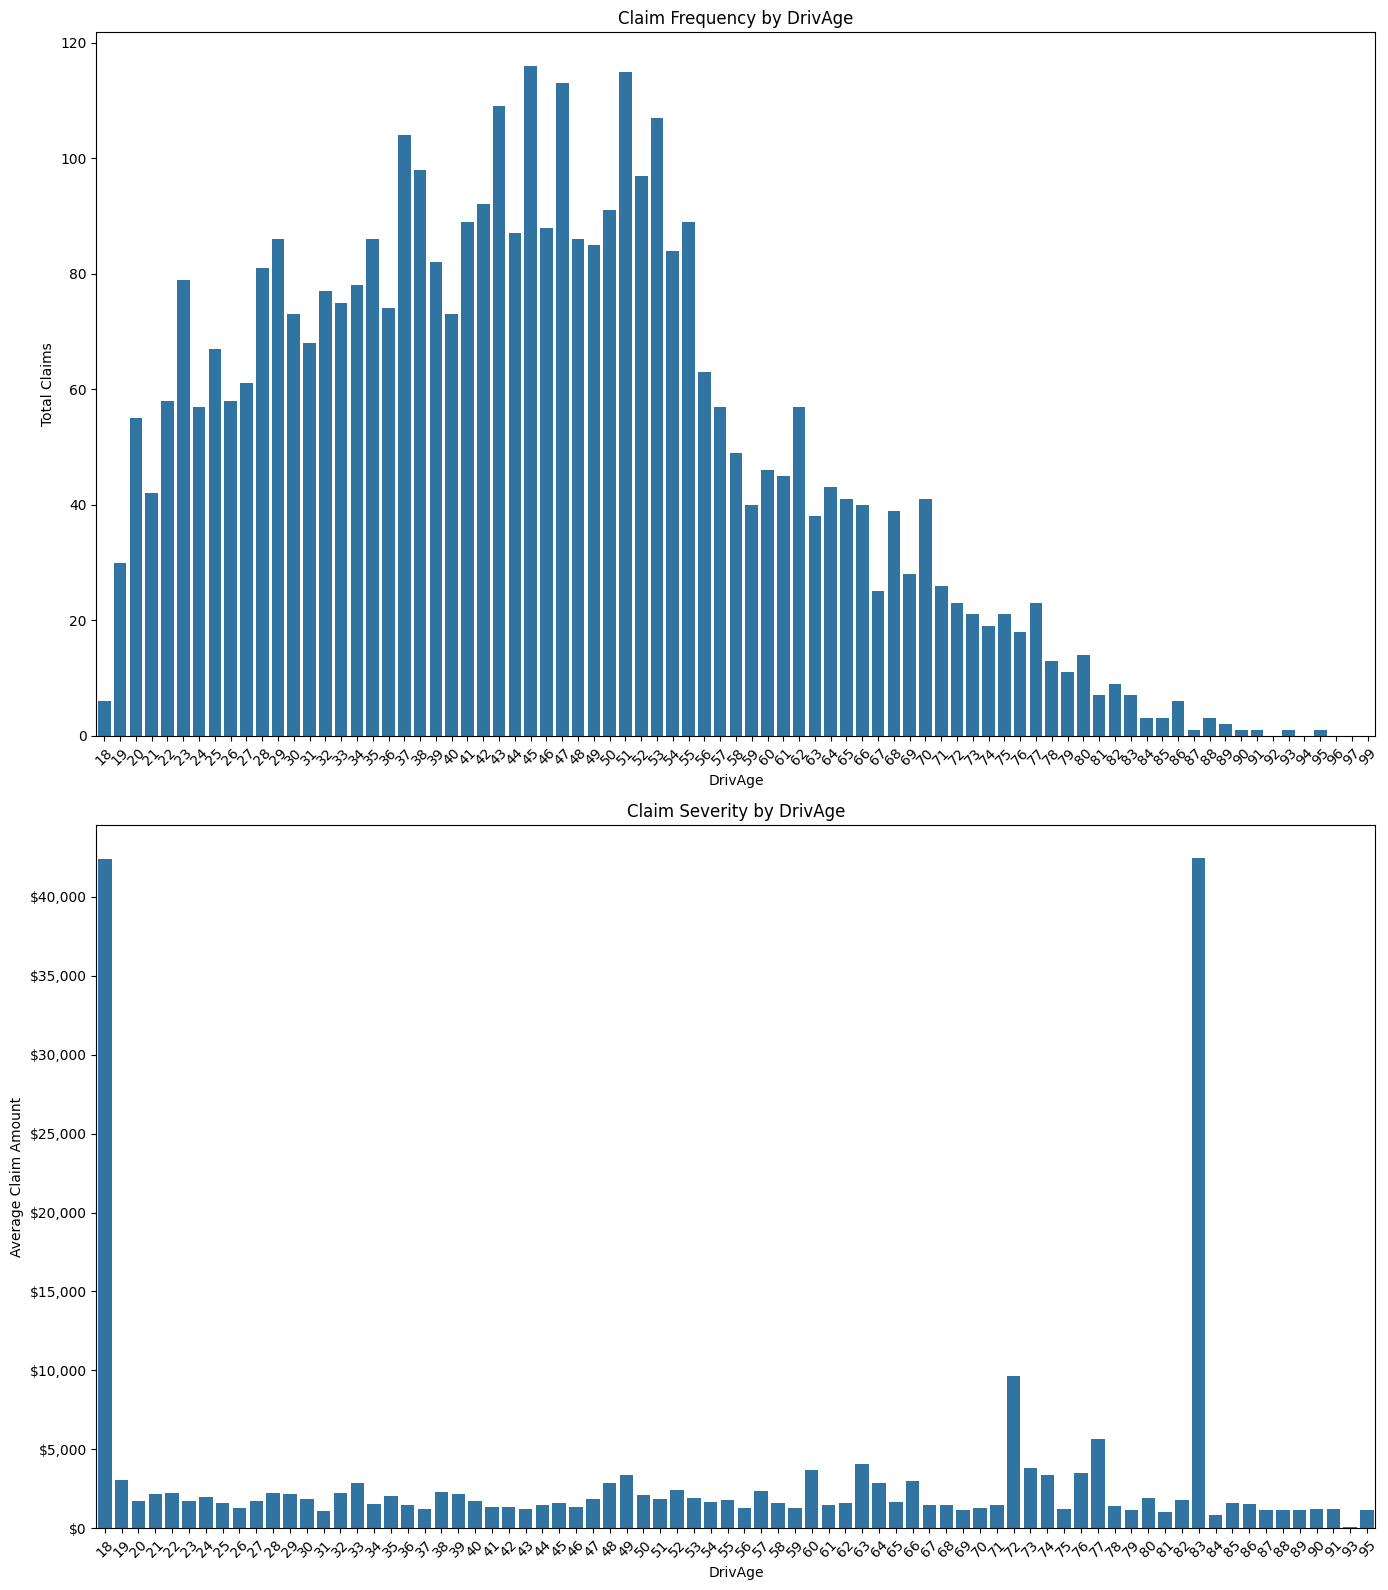

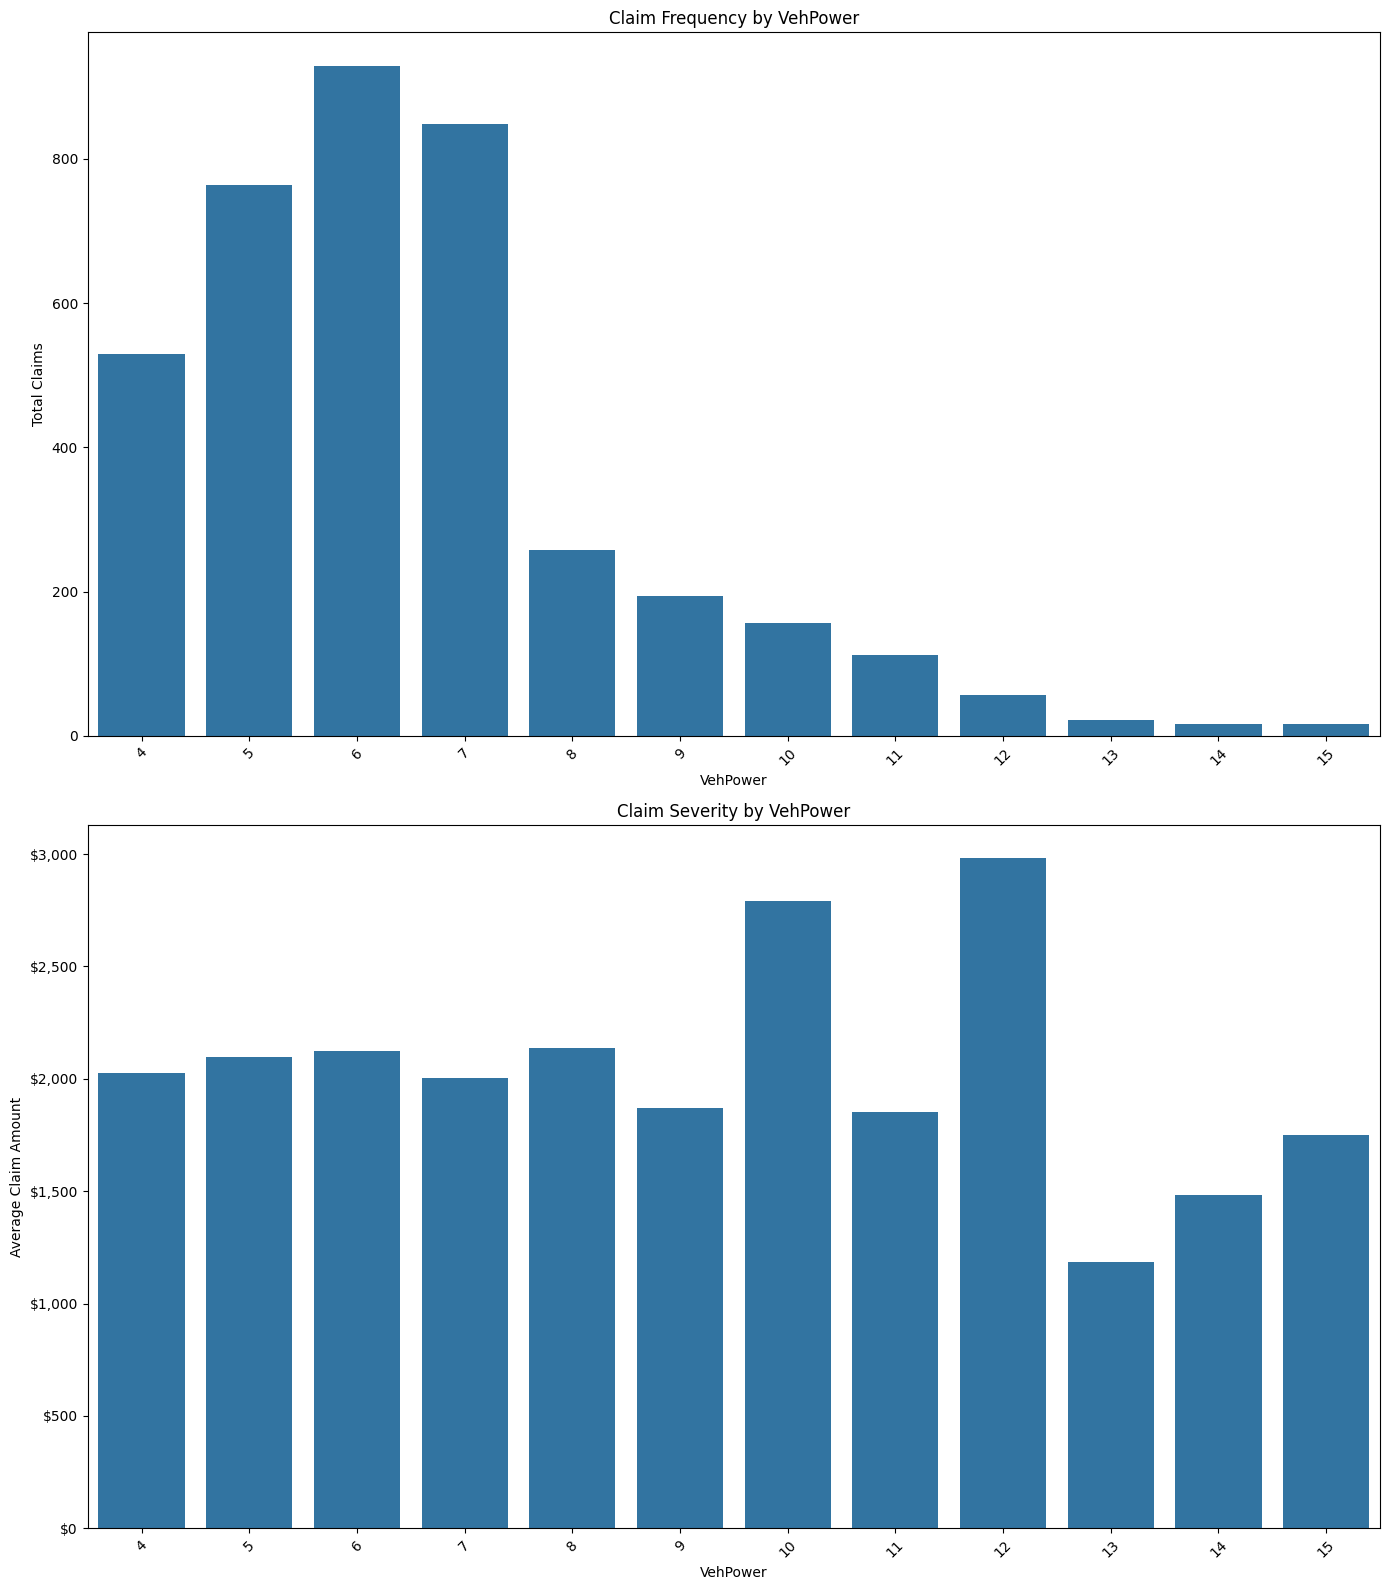

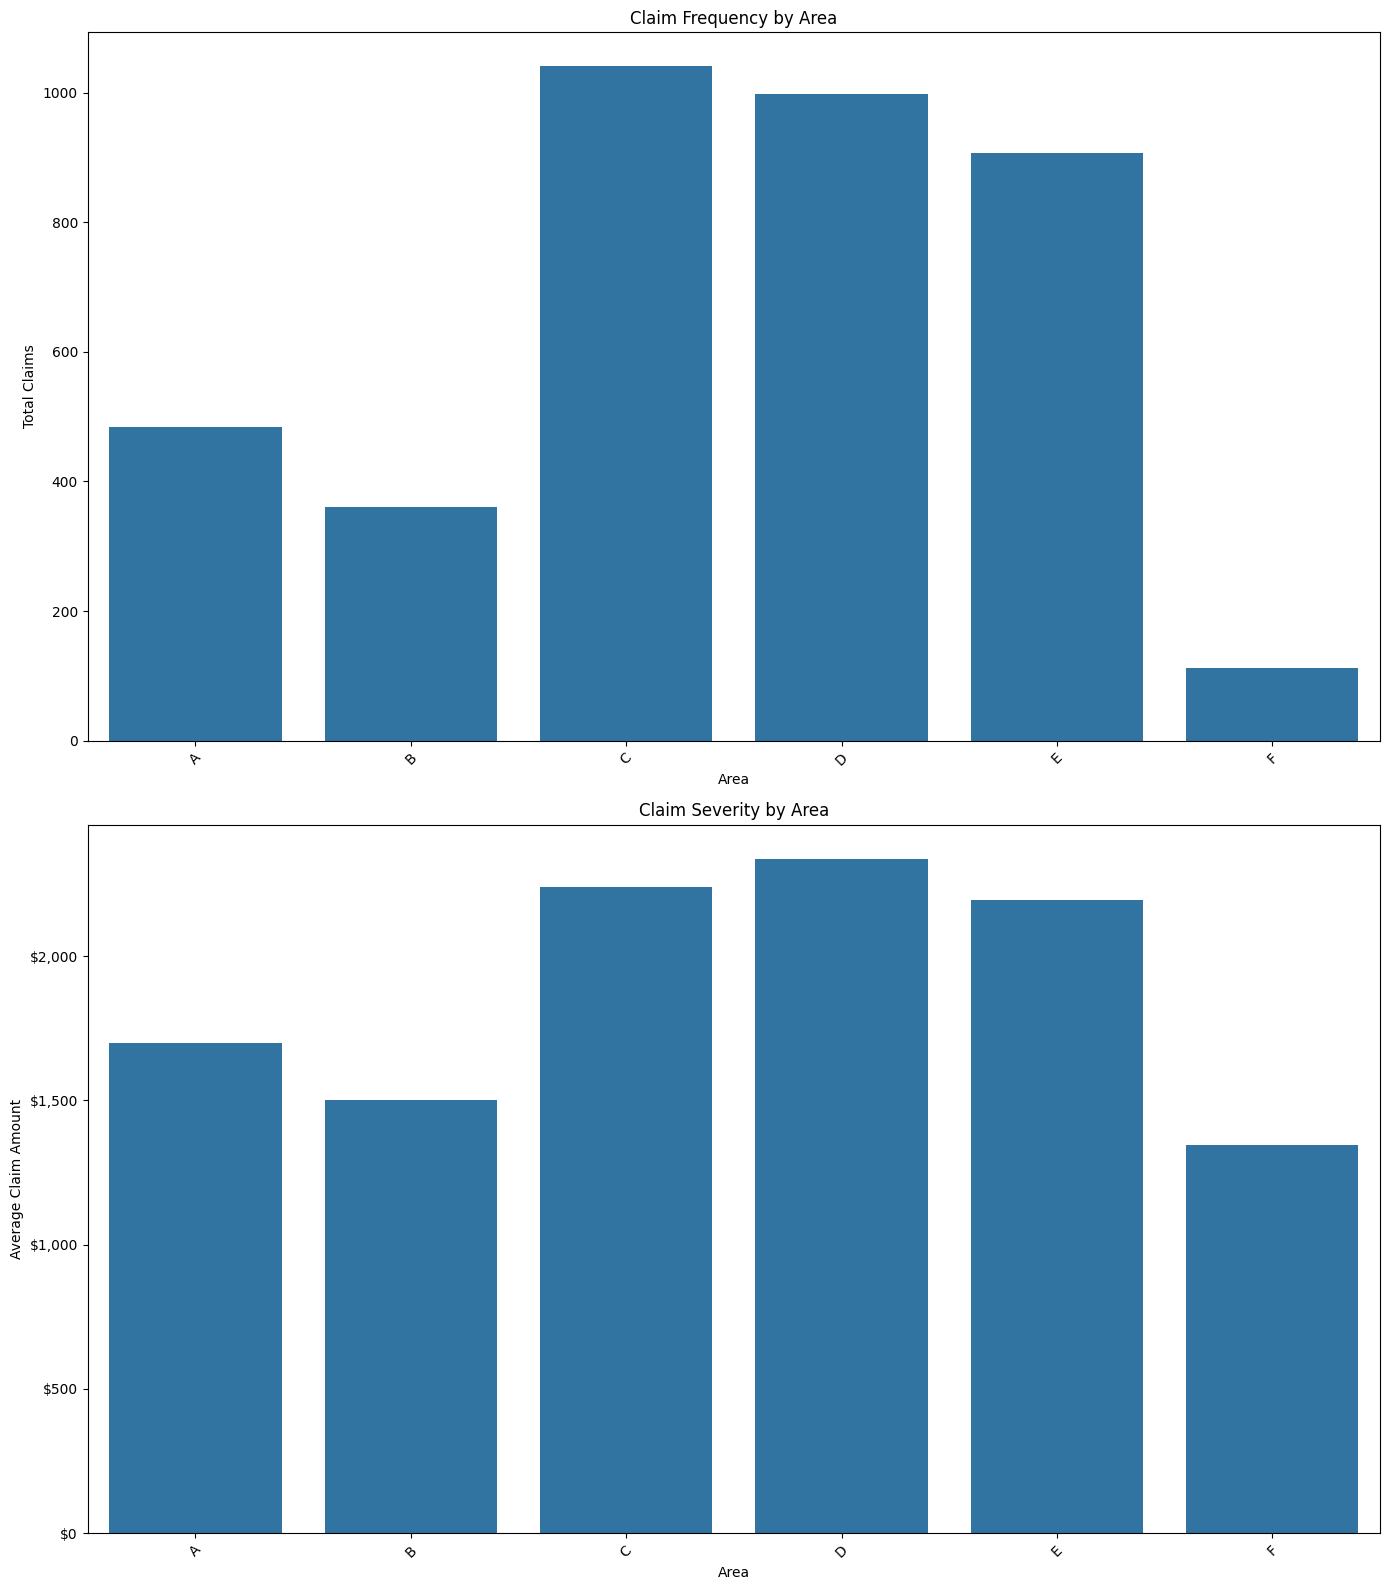

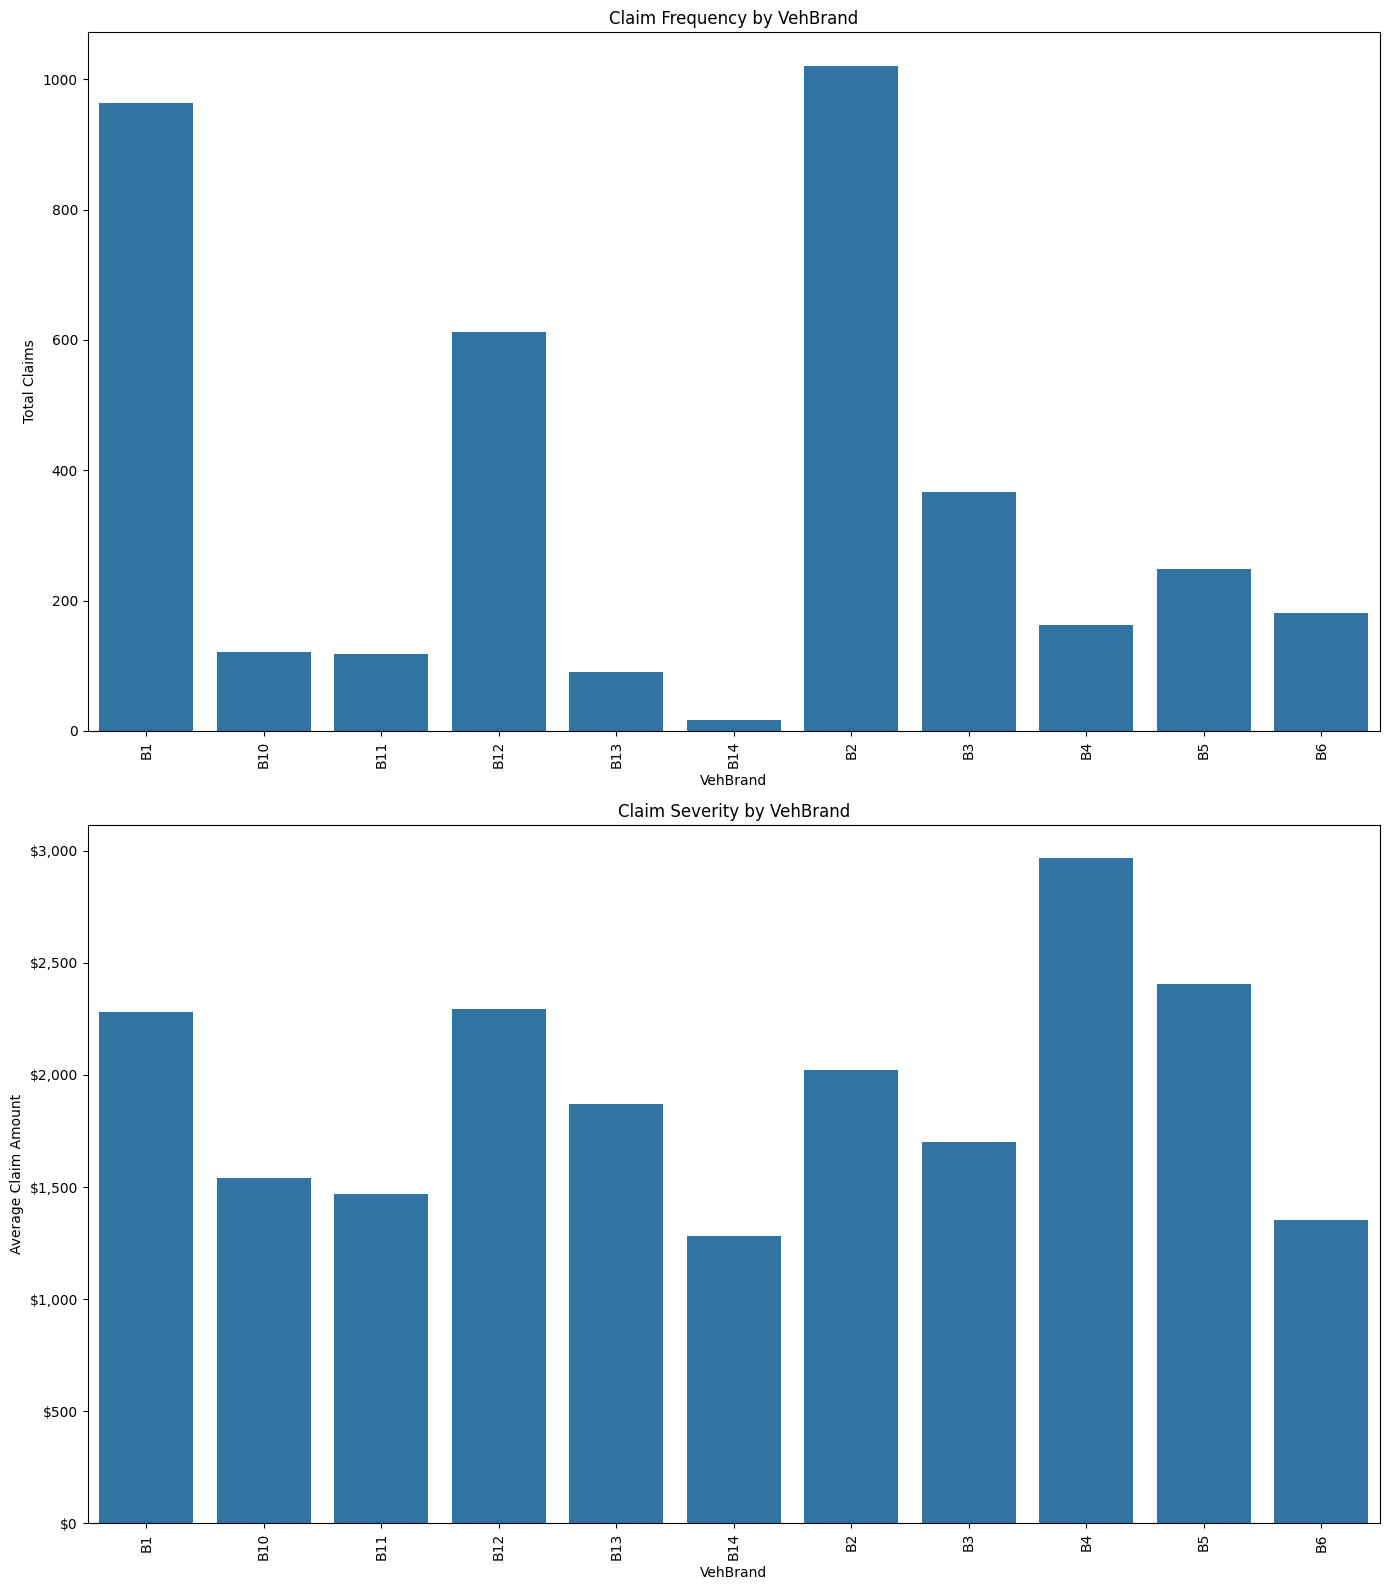

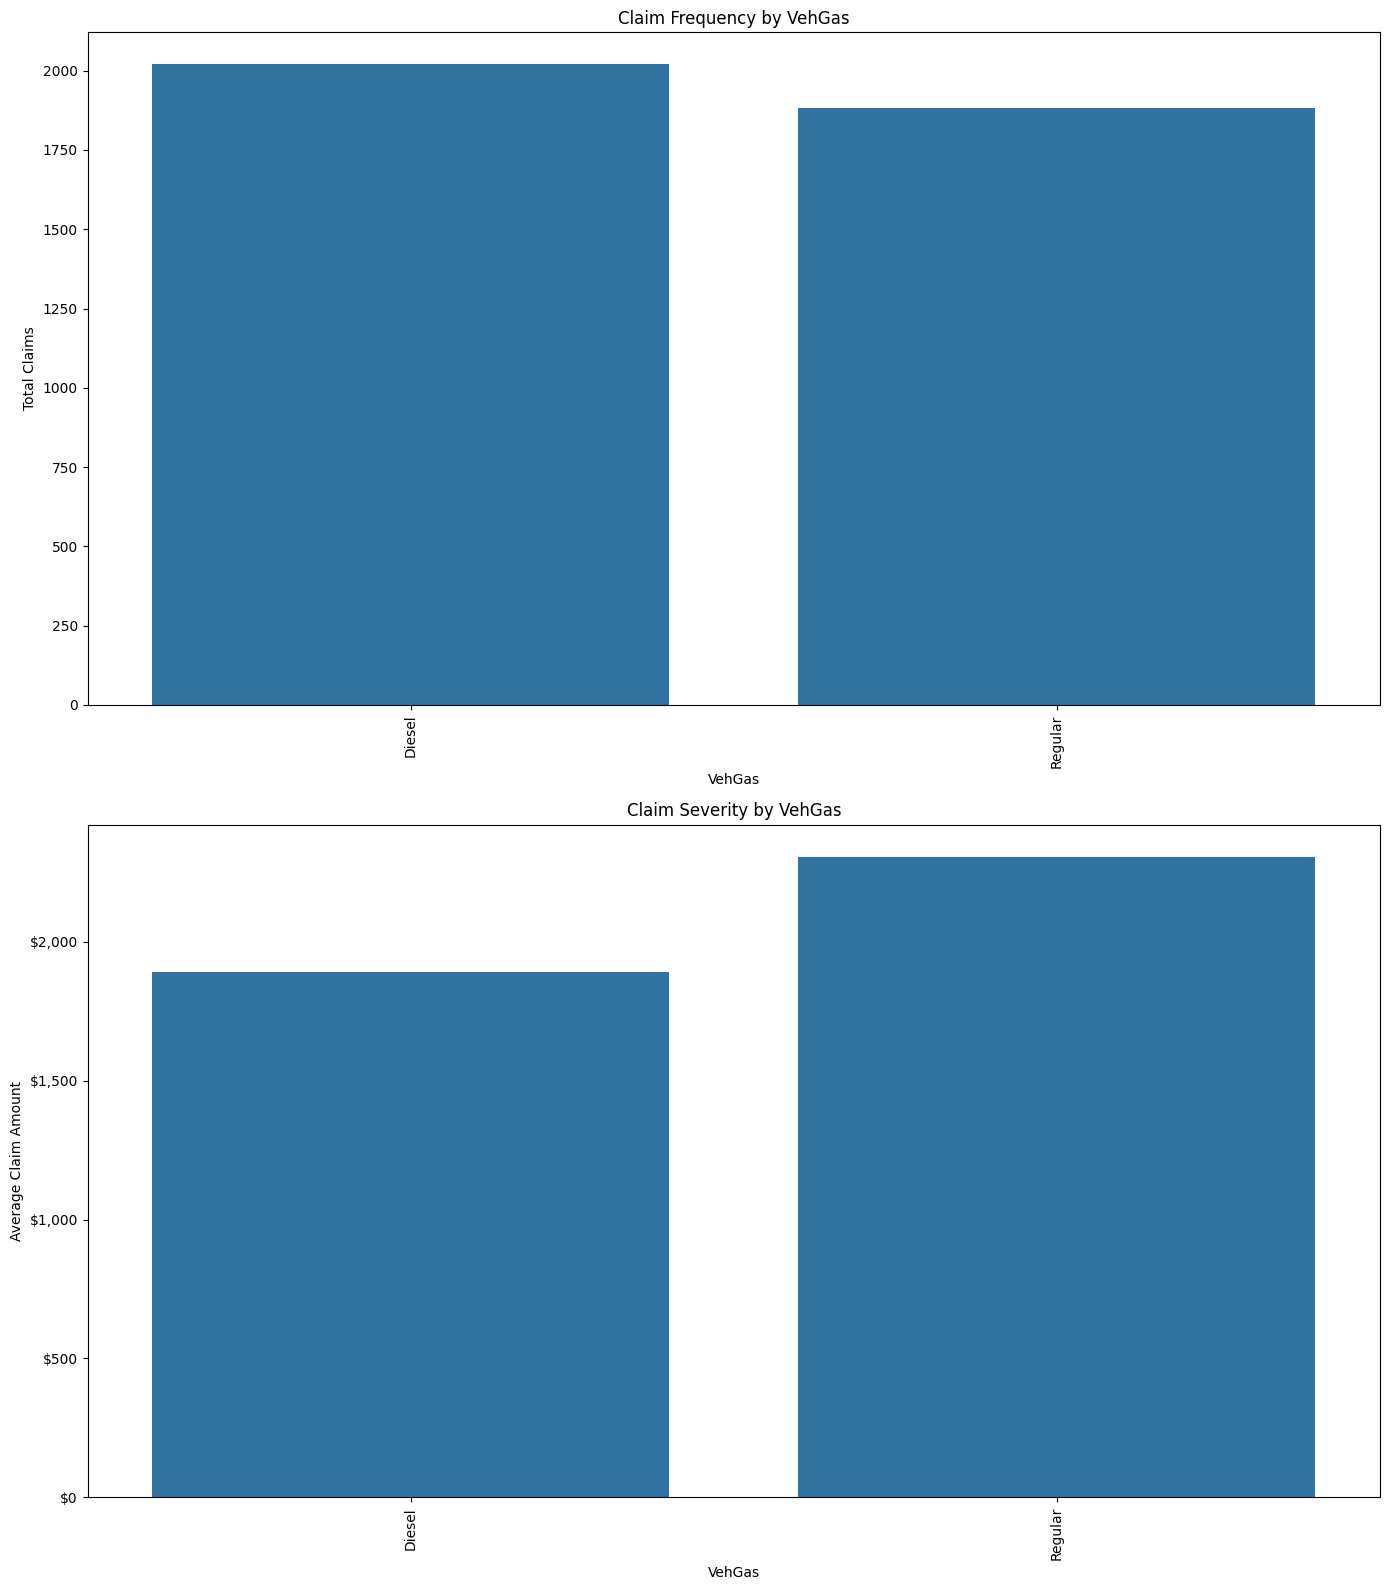

In [54]:
def plot_data(data, group_var, title_suffix, ylabel, rotate_x=0):
    """
    Function to plot frequency and severity of claims by policyholder characteristics.
    
    :param data: DataFrame to plot.
    :param group_var: The variable to group by.
    :param title_suffix: Suffix for the plot title.
    :param ylabel: Label for the y-axis.
    :param rotate_x: Degrees to rotate x-axis labels.
    """
    # Calculate frequency and severity
    freq = data.groupby(group_var)['ClaimNb'].sum()
    sev = data[data['ClaimNb'] > 0].groupby(group_var)['ClaimAmount'].mean()
    
    dollar_formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
    fig, axes = plt.subplots(2, 1, figsize=(14, 16))
    
    # Plot Frequency
    sns.barplot(ax=axes[0], x=freq.index, y=freq.values)
    axes[0].set_title(f'Claim Frequency by {title_suffix}')
    axes[0].set_xlabel(group_var)
    axes[0].set_ylabel('Total Claims')
    axes[0].tick_params(axis='x', rotation=rotate_x)
    
    # Plot Severity
    sns.barplot(ax=axes[1], x=sev.index, y=sev.values)
    axes[1].set_title(f'Claim Severity by {title_suffix}')
    axes[1].set_xlabel(group_var)
    axes[1].set_ylabel('Average Claim Amount')
    axes[1].tick_params(axis='x', rotation=rotate_x)
    axes[1].yaxis.set_major_formatter(dollar_formatter)

    plt.tight_layout()
    plt.show()

# Variables to plot
variables = ['VehAge', 'BonusMalus', 'DrivAge', 'VehPower', 'Area', 'VehBrand', 'VehGas']

# Loop through each variable and apply the plotting function
for var in variables:
    rotation_angle = 90 if var in ['BonusMalus', 'VehBrand', 'VehGas'] else 45
    plot_data(claims_data, var, var, 'Claims', rotate_x=rotation_angle)

In [4]:
# Get descriptive statistics from the claims data set 
descriptive_stats = claims_data.describe()
descriptive_stats

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2.617735e+06,0.039020,0.528057,6.460230,6.992550,45.483040,59.822980,1800.69569,76.599887
std,1.643394e+06,0.206296,0.364232,2.055641,5.637297,14.154698,15.652541,3955.08311,1531.841302
min,1.500000e+01,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,2.00000,0.000000
25%,1.156127e+06,0.000000,0.170000,5.000000,2.000000,34.000000,50.000000,94.00000,0.000000
50%,2.271008e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,399.00000,0.000000
75%,4.044791e+06,0.000000,0.990000,7.000000,11.000000,55.000000,65.000000,1658.00000,0.000000
max,6.114324e+06,4.000000,1.000000,15.000000,100.000000,99.000000,230.000000,27000.00000,200000.000000


In [5]:
claims_data['ClaimNb'].value_counts()

ClaimNb
0    96335
1     3441
2      214
3        7
4        3
Name: count, dtype: int64

In [6]:
# Total claims by driver's age 
total_claims_by_age = claims_data.groupby('DrivAge')['ClaimNb'].sum()
total_claims_by_age = pd.DataFrame(total_claims_by_age)
total_claims_by_age

,ClaimNb
DrivAge,
18,6
19,30
20,55
21,42
22,58
...,...
94,0
95,1
96,0


In [7]:
# Total claims by vehicle's age 
total_claims_by_vech_age = claims_data.groupby('VehAge')['ClaimNb'].sum()
total_claims_by_vech_age = pd.DataFrame(total_claims_by_vech_age)
total_claims_by_vech_age

,ClaimNb
VehAge,
0,167
1,326
2,335
3,288
4,267
5,227
6,219
7,240
8,227


In [8]:
# Total claims by Bonus/Malus 
total_claims_by_bonus_malus = claims_data.groupby('BonusMalus')['ClaimNb'].sum()
total_claims_by_bonus_malus = pd.DataFrame(total_claims_by_bonus_malus)
total_claims_by_bonus_malus

,ClaimNb
BonusMalus,
50,1694
51,59
52,28
53,18
54,63
...,...
190,0
195,0
196,0


In [9]:
# Total claims by driver's age 
total_claims_by_vech_power = claims_data.groupby('VehPower')['ClaimNb'].sum()
total_claims_by_vech_power = pd.DataFrame(total_claims_by_vech_power)
total_claims_by_vech_power

,ClaimNb
VehPower,
4,529
5,764
6,929
7,849
8,257
9,194
10,157
11,112
12,57


In [10]:
# Filter out zero claim amounts for severity analysis
claim_counts = claims_data['ClaimNb']
non_zero_claims = claims_data[claims_data['ClaimAmount'] > 0]['ClaimAmount']

In [11]:
def calculate_aic(n, ll, k):
    """ Calculate Akaike Information Criterion. """
    return 2 * k - 2 * ll + 2 * k * (k + 1) / (n - k - 1)

def calculate_bic(n, ll, k):
    """ Calculate Bayesian Information Criterion. """
    return -2 * ll + k * np.log(n)

def plot_fit(x, dist, params, title, dist_type='continuous'):
    plt.figure(figsize=(10, 6))
    if dist_type == 'continuous':
        count, bins, ignored = plt.hist(x, bins=30, density=True, alpha=0.5, color='blue', label='Empirical Data')
        x_range = np.linspace(min(bins), max(bins), 100)
        probabilities = dist.pdf(x_range, *params) if dist != pareto else dist.pdf(x_range, *params, scale=1)
        plt.plot(x_range, probabilities, 'r-', linewidth=2, label=f'Fit: {dist.name}')
    else:
        weights = np.ones_like(x) / len(x)
        count, bins, ignored = plt.hist(x, bins=np.arange(x.min(), x.max() + 2) - 0.5, weights=weights, alpha=0.5, color='blue', label='Empirical Claims Data')
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        probabilities = dist.pmf(bin_centers, *params) if dist != pareto else dist.pmf(bin_centers, *params, scale=1)
        plt.plot(bin_centers, probabilities, 'r-', linewidth=2, label=f'Fit: {dist.name}')

    plt.title(title)
    plt.xlabel('Number of Claims' if dist_type == 'discrete' else 'Claim Amount')
    plt.ylabel('Probability' if dist_type == 'discrete' else 'Density')
    plt.legend()
    plt.show()

    # Safe log-likelihood calculation
    eps = 1e-10  # A small constant to prevent log(0)
    log_likelihood = np.sum(np.log(dist.pmf(x, *params) + eps)) if dist_type == 'discrete' else np.sum(np.log(dist.pdf(x, *params) + eps))
    n = len(x)
    k = len(params)
    aic = calculate_aic(n, log_likelihood, k)
    bic = calculate_bic(n, log_likelihood, k)
    print(f"AIC for {title}: {aic}")
    print(f"BIC for {title}: {bic}")

# Fitting Claim Frequency Distributions

## Fitting with Poisson, Binomial and Negative Binomial Distribution
We fit the claim frequency data to three different distributions: Poisson, Binomial, and Negative Binomial. For each distribution, the parameters are estimated using the respective fitting methods. The fitted parameters are then used to plot the frequency distribution.

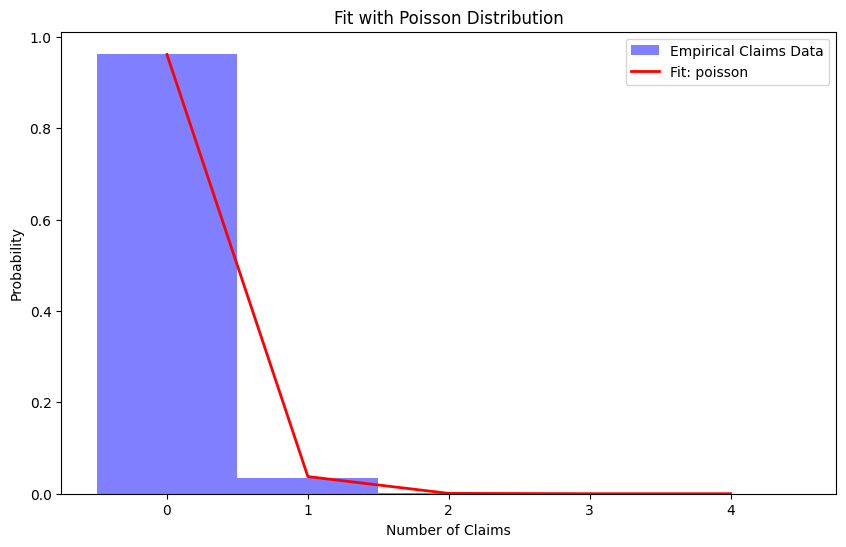

AIC for Fit with Poisson Distribution: 33460.499374859624
BIC for Fit with Poisson Distribution: 33470.0122603238


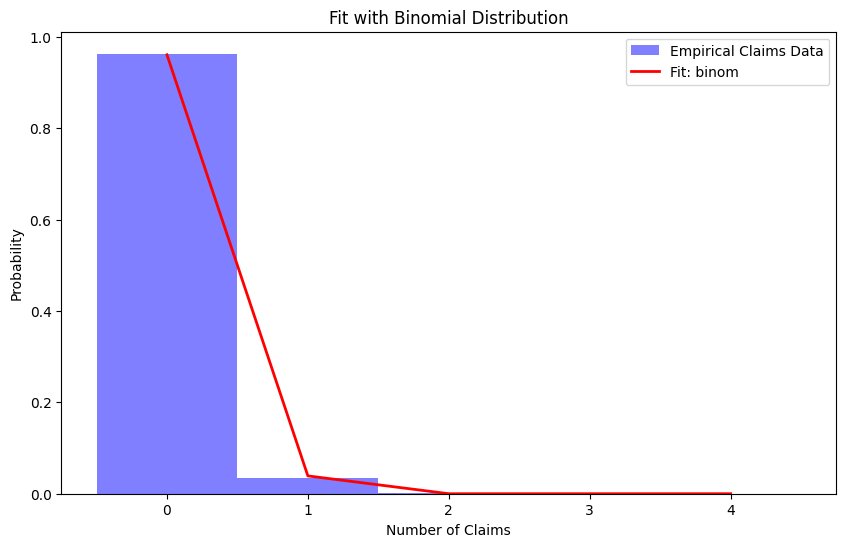

AIC for Fit with Binomial Distribution: 40311.18360245922
BIC for Fit with Binomial Distribution: 40330.20933338556


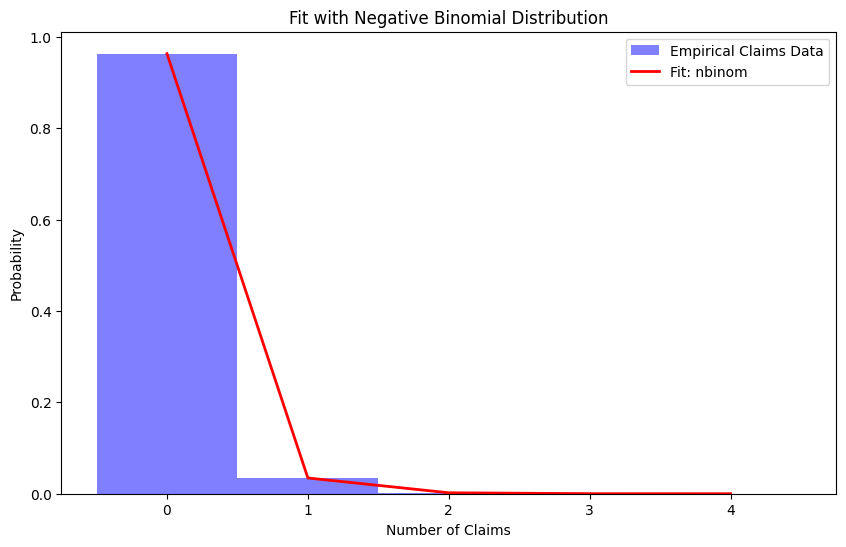

AIC for Fit with Negative Binomial Distribution: 33220.908366396994
BIC for Fit with Negative Binomial Distribution: 33239.934097323334


In [12]:
# Poisson Distribution Fitting
lambda_poisson = np.mean(claim_counts)
params_poisson = [lambda_poisson]
plot_fit(claim_counts, poisson, params_poisson, 'Fit with Poisson Distribution', dist_type='discrete')

# Binomial Distribution Fitting
n_trials = 1  # This should be adjusted based on your specific scenario
p_success = np.mean(claim_counts) / n_trials
params_binom = [n_trials, p_success]
plot_fit(claim_counts, binom, params_binom, 'Fit with Binomial Distribution', dist_type='discrete')

# Negative Binomial Distribution Fitting
r_negbin = (np.mean(claim_counts)**2) / (np.var(claim_counts) - np.mean(claim_counts))
p_negbin = r_negbin / (r_negbin + np.mean(claim_counts))
params_negbin = [r_negbin, p_negbin]
plot_fit(claim_counts, nbinom, params_negbin, 'Fit with Negative Binomial Distribution', dist_type='discrete')

In [13]:
def calculate_aic(n, ll, k):
    """
    Calculate Akaike Information Criterion.
    """
    return 2*k - 2*ll + 2*k*(k+1)/(n-k-1)

def calculate_bic(n, ll, k):
    """
    Calculate Bayesian Information Criterion.
    """
    return -2*ll + k*np.log(n)

def plot_fit_severity(x, dist, params, title):
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(x, bins=30, density=True, alpha=0.5, color='g', label='Empirical Severity Data')
    xmin, xmax = plt.xlim()
    x_range = np.linspace(xmin, xmax, 100)

    if dist != pareto:
        probabilities = dist.pdf(x_range, *params)
        log_likelihood = np.sum(np.log(dist.pdf(x, *params)))
    else:
        probabilities = dist.pdf(x_range, *params)
        log_likelihood = np.sum(np.log(dist.pdf(x, *params)))

    plt.plot(x_range, probabilities, 'k-', linewidth=2, label=f'Fit: {dist.name}')
    plt.title(title)
    plt.xlabel('Claim Amount')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Calculate AIC and BIC
    n = len(x)
    k = len(params)
    aic = calculate_aic(n, log_likelihood, k)
    bic = calculate_bic(n, log_likelihood, k)
    print(f"AIC for {title}: {aic}")
    print(f"BIC for {title}: {bic}")

# Fitting Claim Severity Distributions

## Fitting with Log-normal Distribution, Pareto and Gamma
We fit the claim severity data to a log-normal, Pareto and Gamma distribution. The parameters of the distribution are estimated using the `lognorm.fit` method with `floc` set to 0. 
The fitted parameters are then used to plot the severity distribution

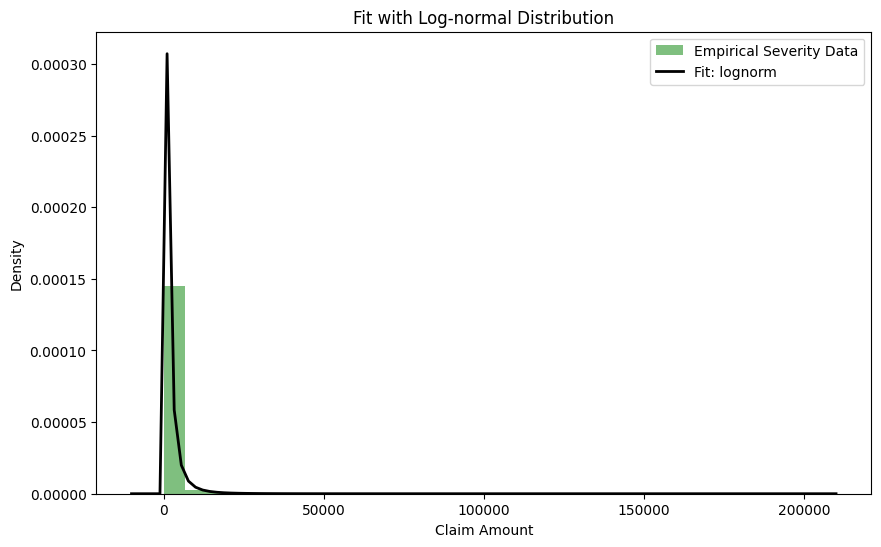

AIC for Fit with Log-normal Distribution: 61901.186253035194
BIC for Fit with Log-normal Distribution: 61919.79944829225


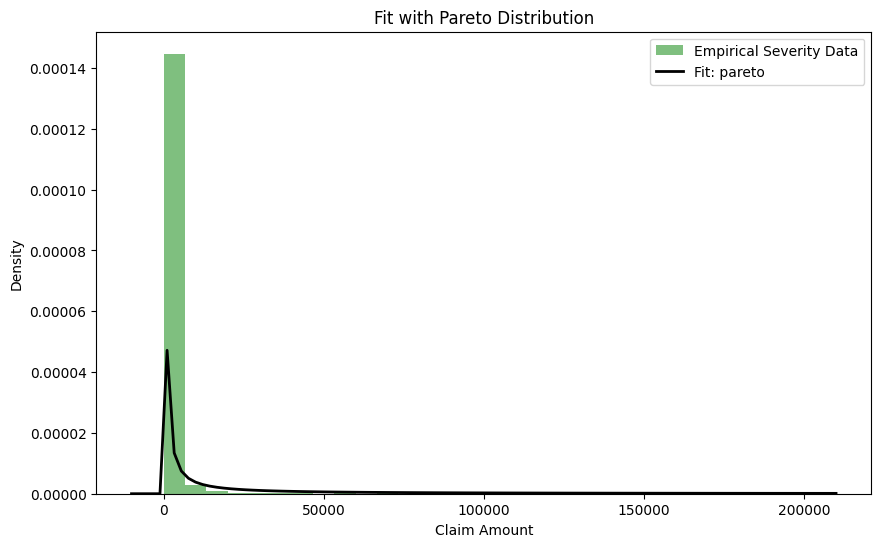

AIC for Fit with Pareto Distribution: 71878.08174119866
BIC for Fit with Pareto Distribution: 71896.69493645572


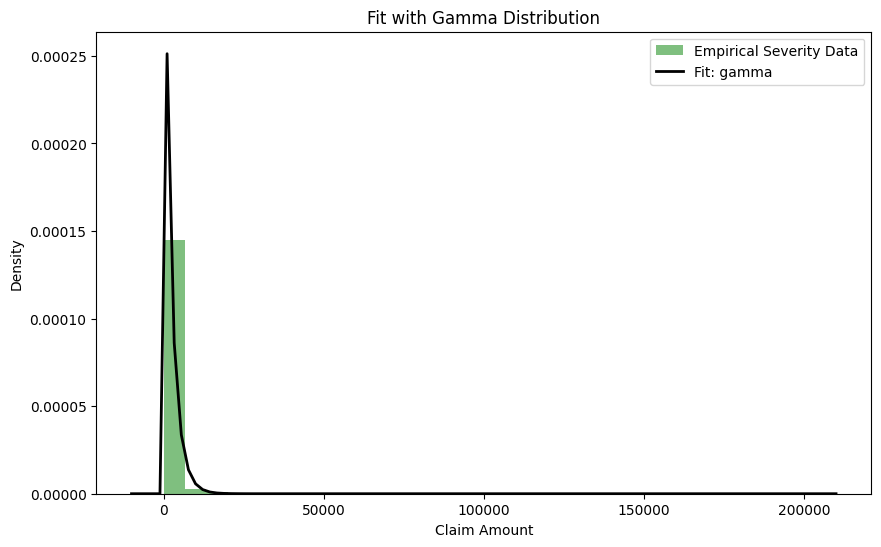

AIC for Fit with Gamma Distribution: 63202.40850800119
BIC for Fit with Gamma Distribution: 63221.021703258244


In [14]:
# Log-normal fitting
shape, loc, scale = lognorm.fit(non_zero_claims, floc=0)
params_lognorm = [shape, loc, scale]
plot_fit_severity(non_zero_claims, lognorm, params_lognorm, 'Fit with Log-normal Distribution')

# Pareto fitting
b, loc, scale = pareto.fit(non_zero_claims, floc=0)  # Fitting with floc set to 0
params_pareto = [b, loc, scale]
plot_fit_severity(non_zero_claims, pareto, params_pareto, 'Fit with Pareto Distribution')

# Gamma fitting
alpha, loc, beta = gamma.fit(non_zero_claims, floc=0)  # Adjusting fit parameters as needed
params_gamma = [alpha, loc, beta]
plot_fit_severity(non_zero_claims, gamma, params_gamma, 'Fit with Gamma Distribution')

# Choosing the Best Distribution for Claim Frequency and Severity

## Claim Frequency Distribution

To determine the best distribution for claim frequency, we compared the AIC and BIC values for Poisson, Binomial, and Negative Binomial distributions. The distribution with the lowest AIC and BIC values is considered the best fit.

### AIC and BIC Values for Claim Frequency Distributions:
- **Poisson Distribution**:
  - AIC: 33460.499374859624
  - BIC: 33470.0122603238
- **Negative Binomial Distribution**:
  - AIC: 33220.908366396994
  - BIC: 33239.934097323334
- **Binomial Distribution**:
  - AIC: 40311.18360245922
  - BIC: 40330.20933338556

### Conclusion:
The Negative Binomial distribution has the lowest AIC and BIC values, indicating that it is the best fit for the claim frequency data.

## Claim Severity Distribution

To determine the best distribution for claim severity, we compared the AIC and BIC values for Log-normal, Pareto, and Gamma distributions. The distribution with the lowest AIC and BIC values is considered the best fit.

### AIC and BIC Values for Claim Severity Distributions:
- **Log-normal Distribution**:
  - AIC: 61901.186253035194
  - BIC: 61919.79944829225
- **Pareto Distribution**:
  - AIC: 71878.08174119866
  - BIC: 71896.69493645572
- **Gamma Distribution**:
  - AIC: 63202.40850800119
  - BIC: 63221.021703258244

### Conclusion:
The Log-normal distribution has the lowest AIC and BIC values, indicating that it is the best fit for the claim severity data.

# Risk Group Assignment Algorithm based on  individual characteristics

# Predicting Total Losses using Monte Carlo Simulation

In [15]:
# Claim_counts holds historical claim frequency data
# Non_zero_claims holds historical non-zero claim severities

# Use the fitted parameters from the Negative Binomial and Log-normal fits
# For claim frequency (Negative Binomial)
params_negbin = [r_negbin, p_negbin]  # Fitted Negative Binomial params
# For claim severity (Log-normal)
params_lognorm = [shape, loc, scale]  # Fitted Log-normal params

# Number of simulations and policies
n_simulations = 10000
n_policies = len(claims_data)

# Pre-allocate an array for total losses
total_losses = np.zeros(n_simulations)

# Monte Carlo simulation loop
for i in range(n_simulations):
    # Simulate number of claims for all policies at once
    num_claims = nbinom.rvs(r_negbin, p_negbin, size=n_policies)
    
    # Initialize total claim severity for each policy
    total_claim_severity = np.zeros(n_policies)
    
    # For policies with claims, simulate the severity
    for j in range(n_policies):
        if num_claims[j] > 0:
            # Simulate claim severity for each claim and sum them for the policy
            total_claim_severity[j] = lognorm.rvs(shape, loc, scale, size=num_claims[j]).sum()
    
    # Store the total loss for this simulation
    total_losses[i] = total_claim_severity.sum()

# Analyze the distribution of total losses
expected_total_loss = np.mean(total_losses)

# Calculate Value-at-Risk (VaR) at different confidence levels (95% and 99%)
var_95 = np.percentile(total_losses, 95)
var_99 = np.percentile(total_losses, 99)

# Plot the total losses distribution and highlight VaR levels
plt.figure(figsize=(10, 6))
plt.hist(total_losses, bins=50, color='skyblue', alpha=0.7)
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label=f'VaR 95%: {var_95:.2f}')
plt.axvline(var_99, color='orange', linestyle='dashed', linewidth=2, label=f'VaR 99%: {var_99:.2f}')
plt.title('Distribution of Total Losses from Monte Carlo Simulation')
plt.xlabel('Total Losses')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

# Printing Risk Measures 
print(f"Expected Total Loss: {expected_total_loss:.2f}")
print(f"95th Percentile Total Loss (VaR 95%): {var_95:.2f}")
print(f"99th Percentile Total Loss (VaR 99%): {var_99:.2f}")

KeyboardInterrupt: 

# Resulting Distribution from Convolution

In this Monte Carlo simulation, we model the claim frequency using a Negative Binomial distribution and the claim severity using a Log-normal distribution. The resulting distribution of total losses from this convolution is an aggregated loss distribution.

## Characteristics of the Simulated Distribution:
- **Claim Frequency**: Modeled using a Negative Binomial distribution.
- **Claim Severity**: Modeled using a Log-normal distribution.
- **Total Losses**: The sum of individual claim severities for each simulated number of claims.

### Analysis of Simulated Total Losses:
- **Expected Total Loss**: The mean of the total losses from the simulations.
- **Value-at-Risk (VaR)**: Calculated at different confidence levels (e.g., 95% and 99%) to assess the risk of extreme losses.

In [108]:
# Assuming 'data' is your DataFrame
model_negbin = smf.glm(formula='ClaimNb ~ DrivAge + VehAge + VehPower + BonusMalus + Region + Density',
                       data=claims_data, family=sm.families.NegativeBinomial()).fit()
print(model_negbin.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99973
Model Family:        NegativeBinomial   Df Model:                           26
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16305.
Date:                Wed, 09 Oct 2024   Deviance:                       22206.
Time:                        14:27:00   Pearson chi2:                 1.04e+05
No. Iterations:                     7   Pseudo R-squ. (CS):           0.006556
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.5225      0.133    -41.538

In [113]:
# Log-transform the claim amount to fit a Log-normal distribution
claims_data['log_ClaimAmount'] = np.log(claims_data['ClaimAmount'] + 1)  # Adding 1 to avoid log(0)

model_lognorm = smf.ols(formula='log_ClaimAmount ~ DrivAge + VehAge + VehPower + BonusMalus + Region + Density',
                        data=claims_data[claims_data['ClaimAmount'] > 0]).fit()  # Fit only on non-zero claims
print(model_lognorm.summary())


                            OLS Regression Results                            
Dep. Variable:        log_ClaimAmount   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.784
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           3.48e-06
Time:                        14:28:35   Log-Likelihood:                -5685.5
No. Observations:                3665   AIC:                         1.143e+04
Df Residuals:                    3638   BIC:                         1.159e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1952      0.155     39.942

# Logistic Regression: Predict the probability of filing a claim (i.e., whether a claim is made or not)

## Goal: Understand which characteristics increase or decrease the likelihood of a policyholder filing a claim (frequency)

In [77]:
# Create binary variable for claims (1 if there was at least one claim, 0 otherwise)
claims_data['Claim_binary_variable'] = claims_data['ClaimNb'].apply(lambda x: 1 if x > 0 else 0)

# Convert categorical variables to dummy variables (e.g., Area, VehBrand, VehGas, Region)
claims_data = pd.get_dummies(claims_data, columns=['Area', 'VehBrand', 'VehGas', 'Region'], drop_first=True, dtype = int)

# Select the independent variables (Excluding IDpol and ClaimAmount)
independent_vars = ['Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']

# Adding dummy variables to independent_vars for policyholder's area, vehicle's brand, the type of gas used and for the region of the policyholder
independent_vars += [col for col in claims_data.columns if col.startswith('Area_') or col.startswith('VehBrand_') or col.startswith('VehGas_') or col.startswith('Region_')]

# Add constant term to the model
X = sm.add_constant(claims_data[independent_vars])

# Define the dependent variable
y = claims_data['Claim_binary_variable']

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.148120
         Iterations 8
                             Logit Regression Results                            
Dep. Variable:     Claim_binary_variable   No. Observations:               100000
Model:                             Logit   Df Residuals:                    99956
Method:                              MLE   Df Model:                           43
Date:                   Wed, 09 Oct 2024   Pseudo R-squ.:                 0.05745
Time:                           12:50:22   Log-Likelihood:                -14812.
converged:                          True   LL-Null:                       -15715.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.6306      0.159    -41.626      0.000      -6.943      

In [82]:
# Check for correlation between risk caracteristics
claims_data[['VehPower', 'DrivAge', 'BonusMalus', 'Density', 'Exposure']].corr()

,VehPower,DrivAge,BonusMalus,Density,Exposure
VehPower,1.000000,0.028375,-0.077144,0.044586,-0.043155
DrivAge,0.028375,1.000000,-0.480037,-0.005337,0.176111
BonusMalus,-0.077144,-0.480037,1.000000,0.080366,-0.182107
Density,0.044586,-0.005337,0.080366,1.000000,-0.070458
Exposure,-0.043155,0.176111,-0.182107,-0.070458,1.000000


# Principles for Risk Categorization (Based on the lecture : Topic 2B: Underwriting): 

Actuarial Criteria:

- **Accuracy**: Variables must have a clear link to expected costs and losses, which our regression analysis helps confirm.
- **Homogeneity**: Each risk group should have similar expected claim costs.
- **Credibility**: Risk categories should be large enough to be statistically reliable.
- **Predictive Stability**: Differences between categories should remain stable over time.

In [101]:
# Group the data by risk group
risk_groups = claims_data.groupby('RiskGroup')

# Initialize a dictionary to store premiums for each risk group
premiums_per_group = {}

# Iterate over each risk group and simulate total losses
for group, group_data in risk_groups:
    # Number of policyholders in this group
    n_policyholders = len(group_data)
    
    # Simulate claim frequencies (using Negative Binomial distribution)
    r_negbin = (np.mean(group_data['ClaimNb'])**2) / (np.var(group_data['ClaimNb']) - np.mean(group_data['ClaimNb']))
    p_negbin = r_negbin / (r_negbin + np.mean(group_data['ClaimNb']))
    
    # Simulate claim frequencies for all policyholders in this group
    simulated_frequencies = np.random.negative_binomial(r_negbin, p_negbin, size=n_policyholders)
    
    # Simulate claim severities (using Log-normal distribution)
    shape, loc, scale = np.lognormal.fit(group_data[group_data['ClaimAmount'] > 0]['ClaimAmount'], floc=0)
    
    # Simulate claim severities for all policyholders in this group
    simulated_severities = np.random.lognormal(shape, scale, size=n_policyholders)
    
    # Calculate total losses for each policyholder in the group
    total_losses_per_policyholder = simulated_frequencies * simulated_severities
    
    # Calculate the 99.5th percentile of the total losses (VaR)
    premium_for_group = np.percentile(total_losses_per_policyholder, 99.5)
    
    # Store the calculated premium for this risk group
    premiums_per_group[group] = premium_for_group

# Premiums for each risk group
for group, premium in premiums_per_group.items():
    print(f"Premium for {group} risk group: {premium}")

AttributeError: module 'numpy' has no attribute 'lognormal'